(1012, 1012, 3)
median_filtered_image
median_filtered_image otsuthresh
median_filtered_image otsuGaussianThresh
filter size:  3  iteration:  0


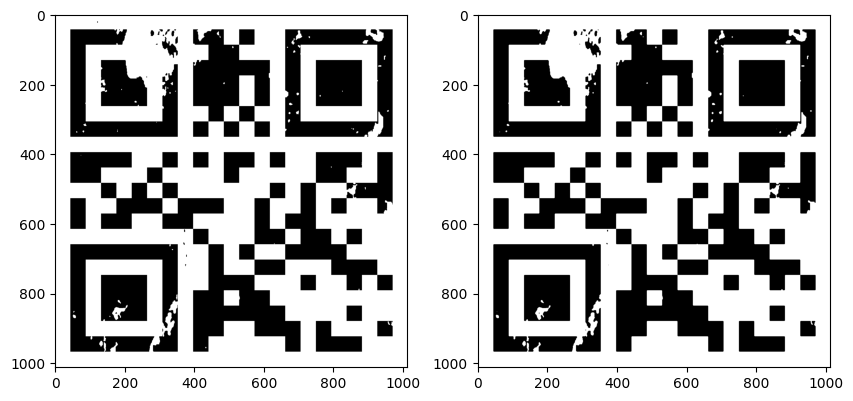

filter size:  3  iteration:  6


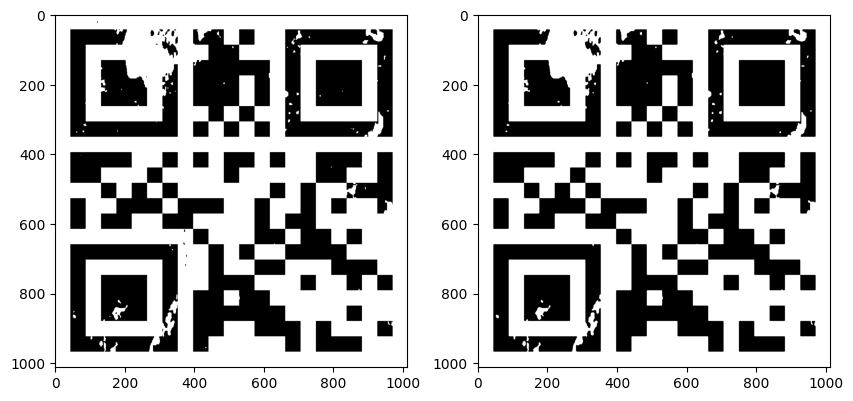

filter size:  3  iteration:  9


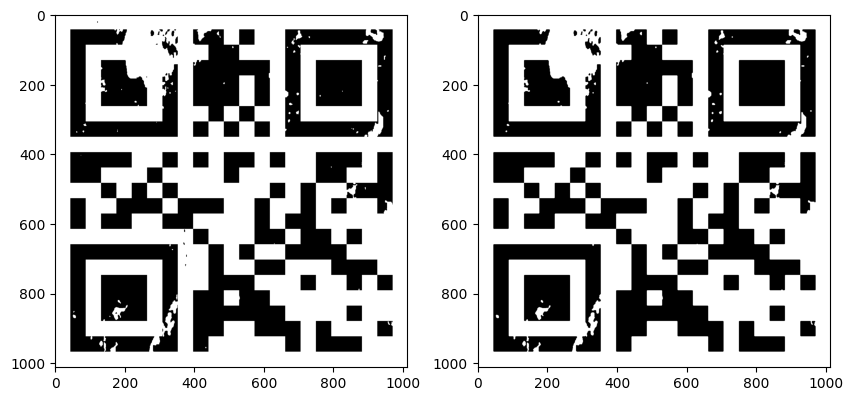

filter size:  5  iteration:  0


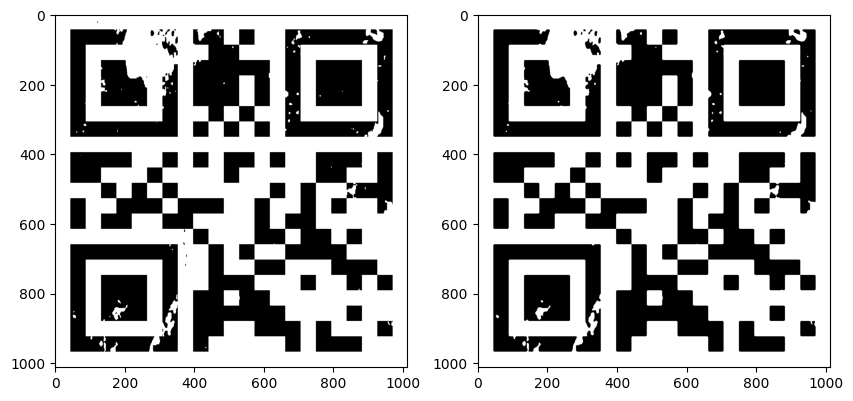

filter size:  5  iteration:  6


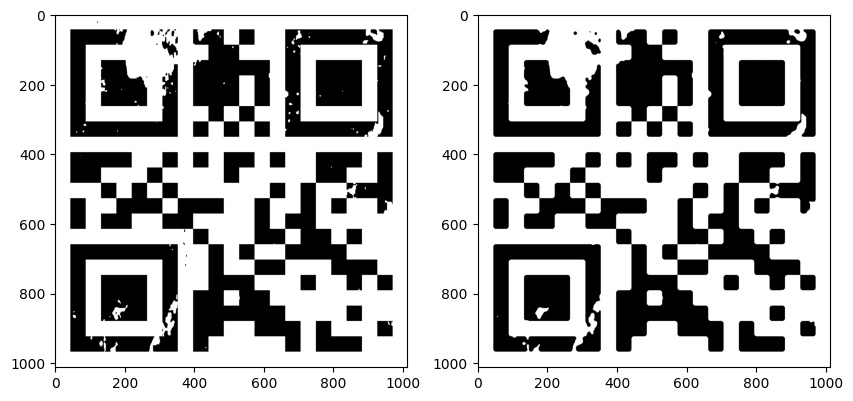

filter size:  5  iteration:  9


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001D9CF718990>>
Traceback (most recent call last):
  File "C:\Users\Ahmed Bakr\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


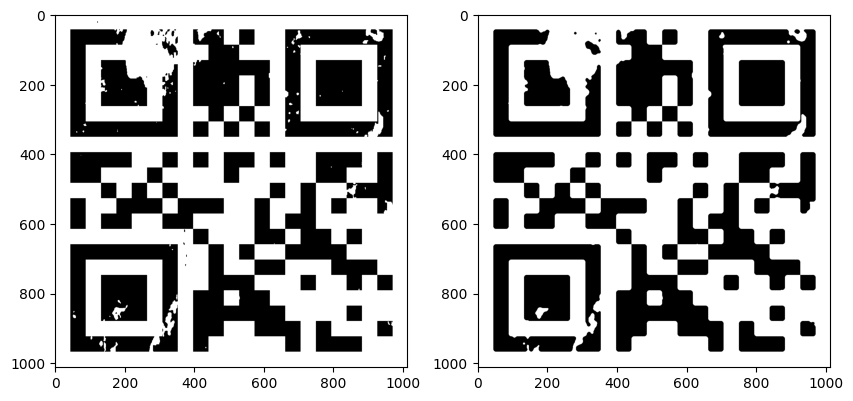

filter size:  7  iteration:  0


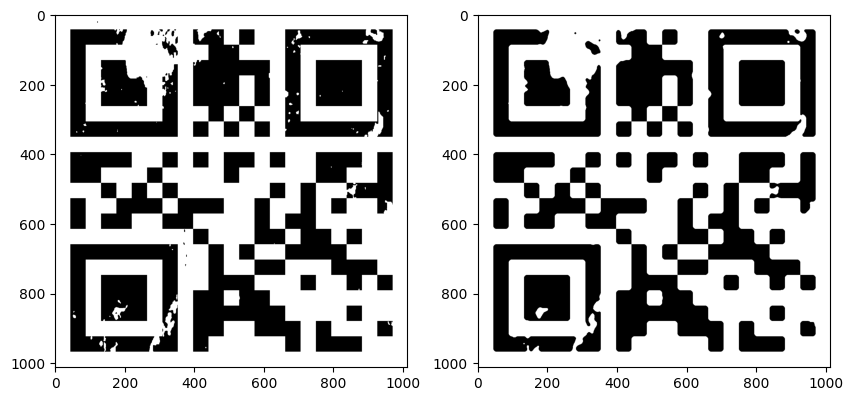

filter size:  7  iteration:  6


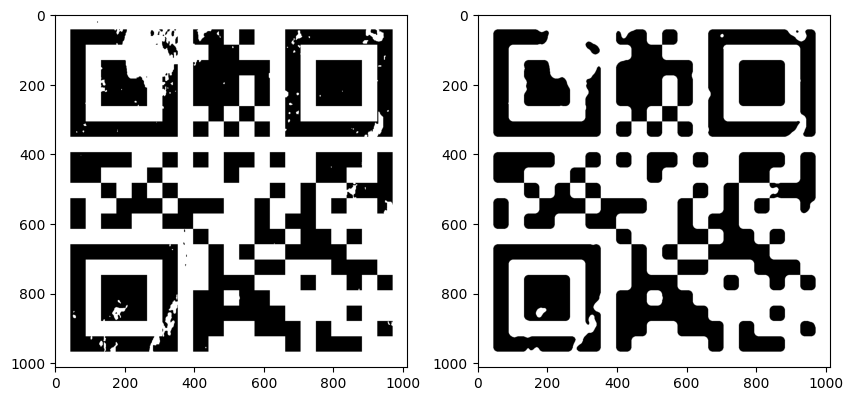

filter size:  7  iteration:  9


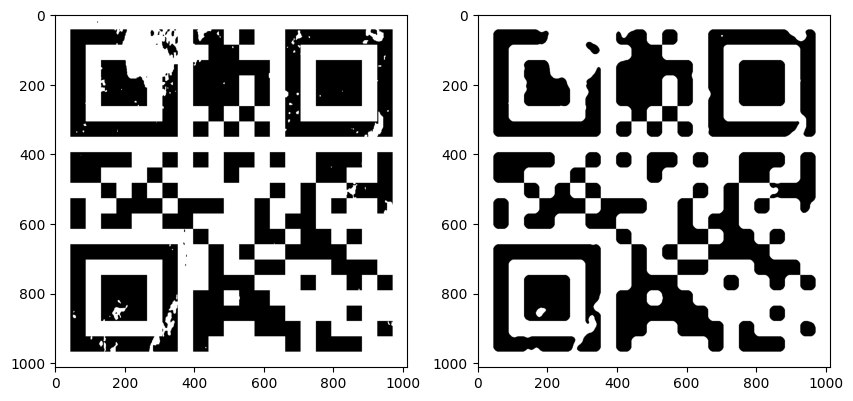

filter size:  9  iteration:  0


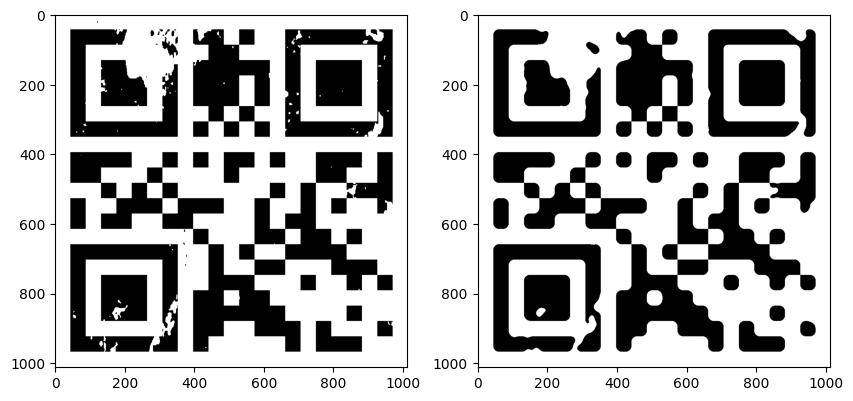

filter size:  9  iteration:  6


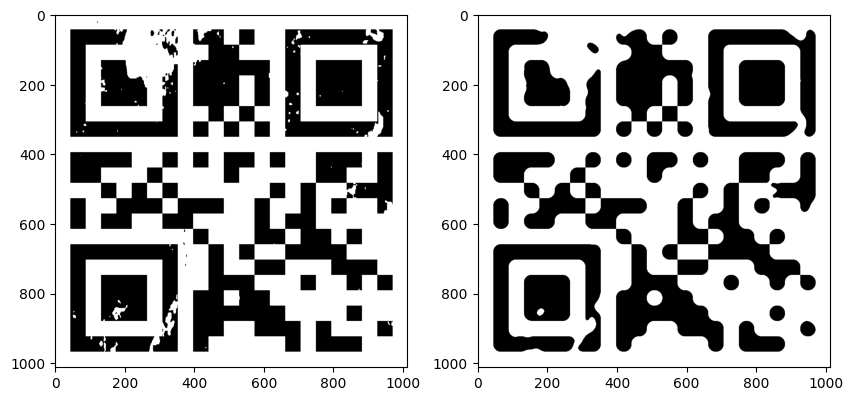

filter size:  9  iteration:  9


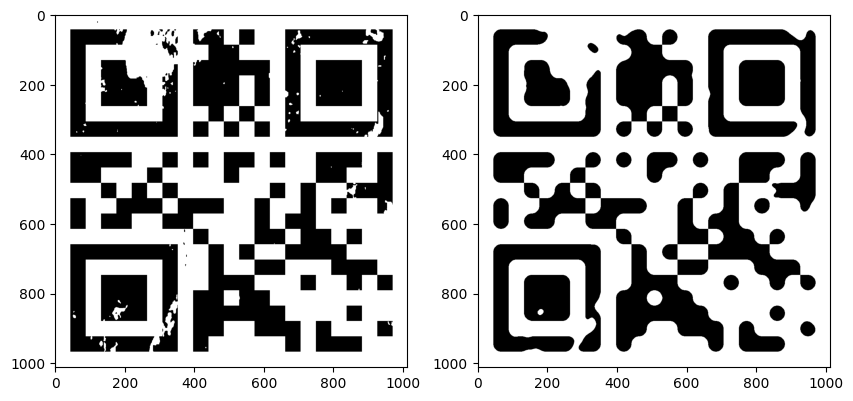

filter size:  11  iteration:  0


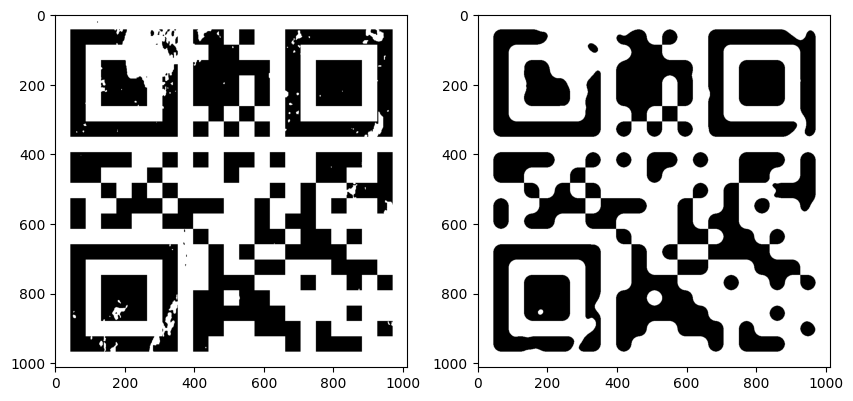

filter size:  11  iteration:  6


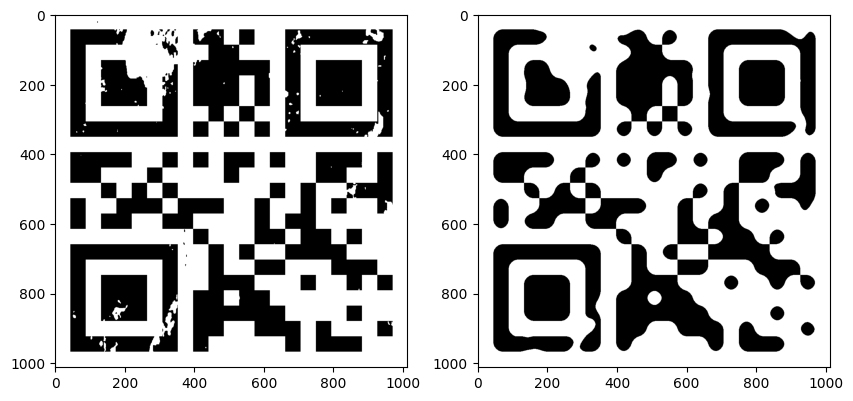

filter size:  11  iteration:  9


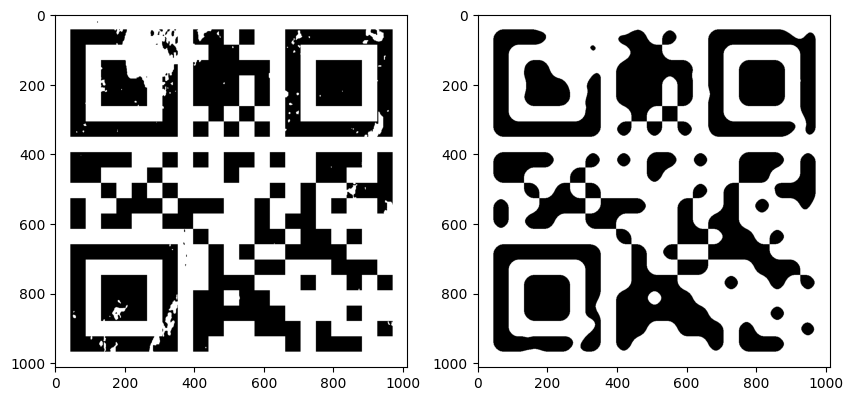

filter size:  13  iteration:  0


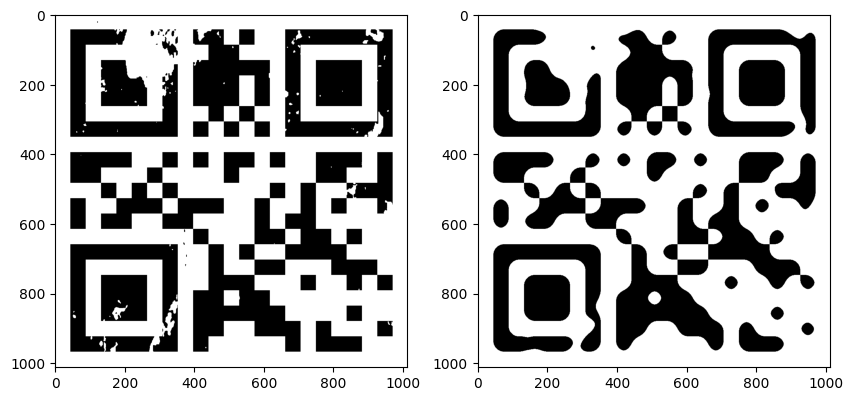

filter size:  13  iteration:  6


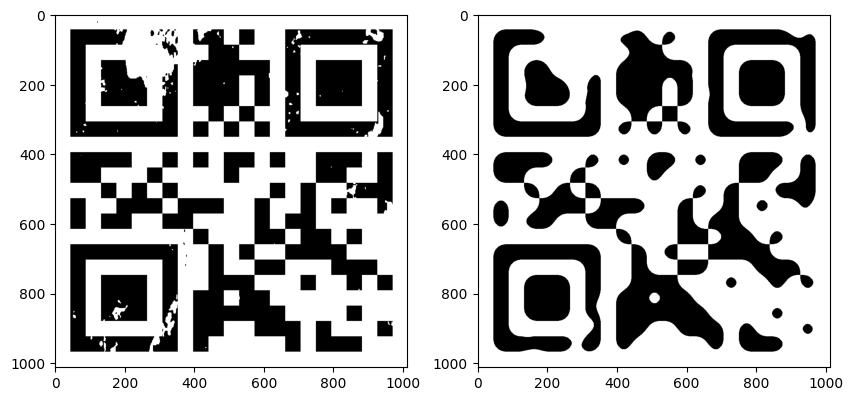

filter size:  13  iteration:  9


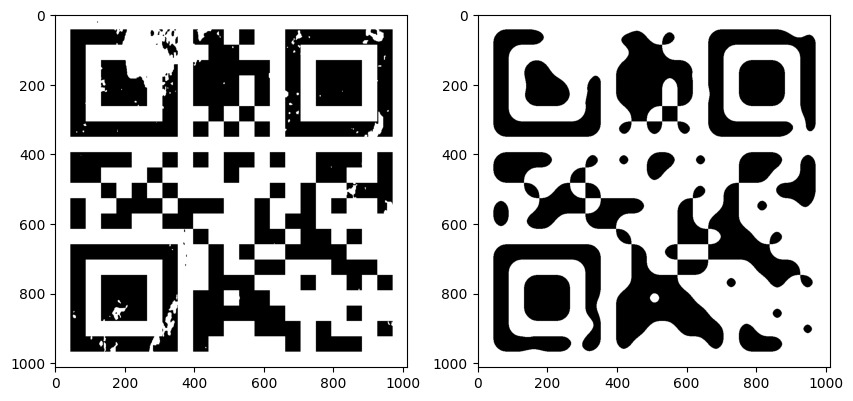

filter size:  15  iteration:  0


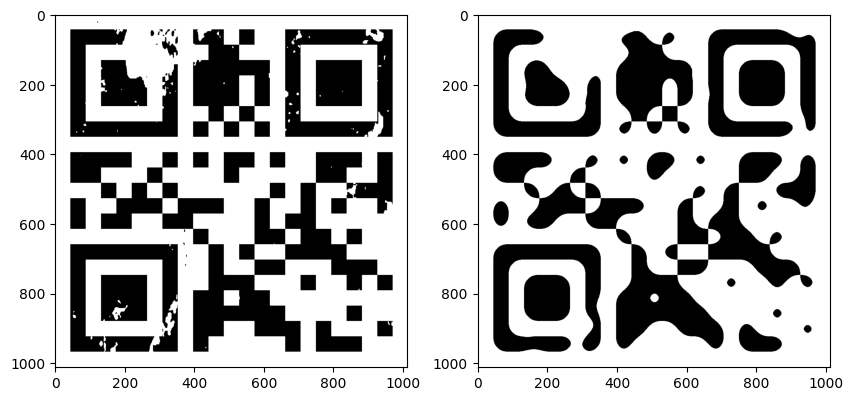

filter size:  15  iteration:  6


In [45]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import utils as ut

image = cv2.imread('../TC/08.png')
print(image.shape)

imageGray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
median_filtered_image = imageGray  # gray

median_filtered_image = cv2.medianBlur(median_filtered_image, 3)
print("median_filtered_image")
# ut.showImage(median_filtered_image)
_,otsuThresh=cv2.threshold(median_filtered_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("median_filtered_image otsuthresh")
# ut.showImage(otsuThresh)

blur = cv2.GaussianBlur(median_filtered_image,(5,5),0)
_,otsuGaussianThresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("median_filtered_image otsuGaussianThresh")
# ut.showImage(otsuGaussianThresh)

# closing

for j in range(3,50,2):    # test different filter sizes
    for i in range(0,10):          # no. of iterations
        otsuGaussianThresh = cv2.medianBlur(otsuGaussianThresh, j)
        if i==0 or i ==6 or i ==9:
            print("filter size: ",j," iteration: ",i)
            _, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) # figsize is in inches, yuck
            plt.sca(axarr[0]); plt.imshow(imageGray,cmap='gray');
            plt.sca(axarr[1]); plt.imshow(otsuGaussianThresh,cmap='gray');
            # plt.sca(axarr[2]); plt.imshow(cont_img,cmap='gray');
            plt.show()

# ut.showImage(median_filtered_image)

### get general information:

1. get percentage of black and white points using different methods
    1. using thresholding, maybe dataminig, count indiviual pixels
    1. or using contours
    1. plot histogram
1. apply different filters and plot the difference
1. try to apply a sequence of filters to see the difference

no thresh
total pixels:  1024144
black pixels:  433631
percenteg of black pixels:  42.34082316549235
contours area:  1753608.5
percentage of contour Area: 171.22675131622117


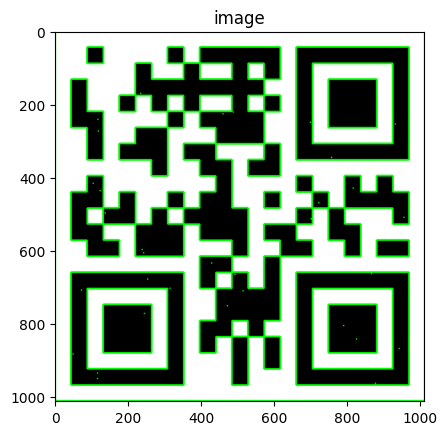

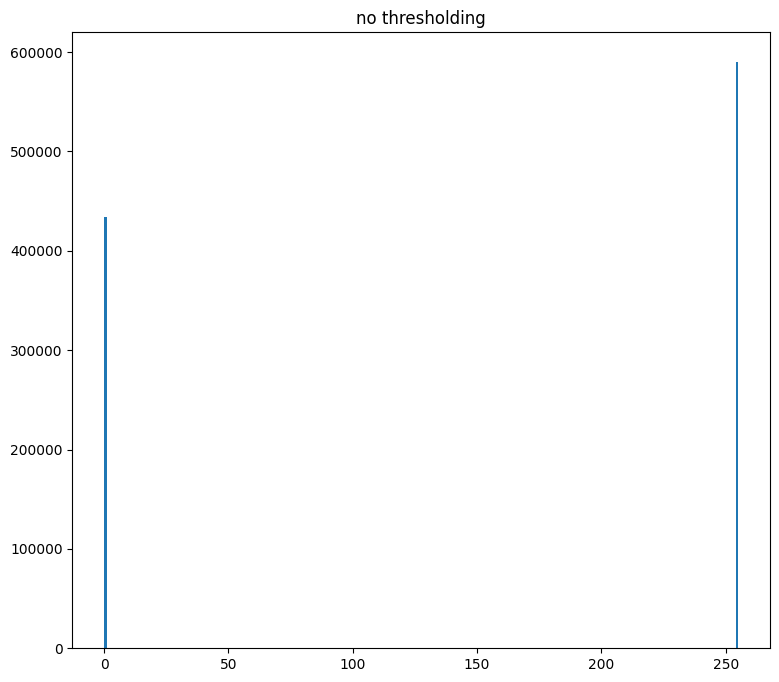

manual thresholding
total pixels:  1024144
black pixels:  433664
percenteg of black pixels:  42.34082316549235
contours area:  1753608.5
percentage of contour Area: 171.22675131622117


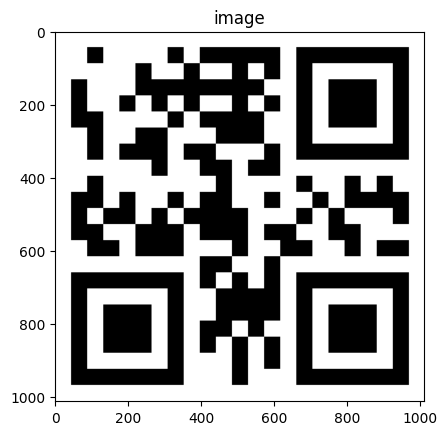

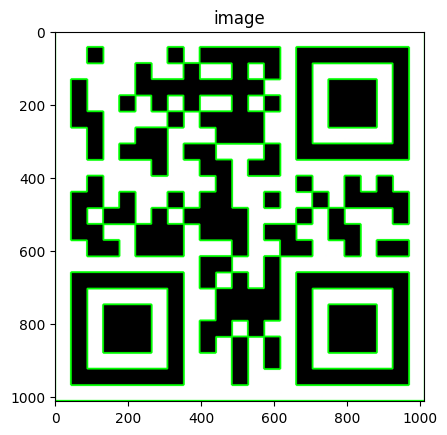

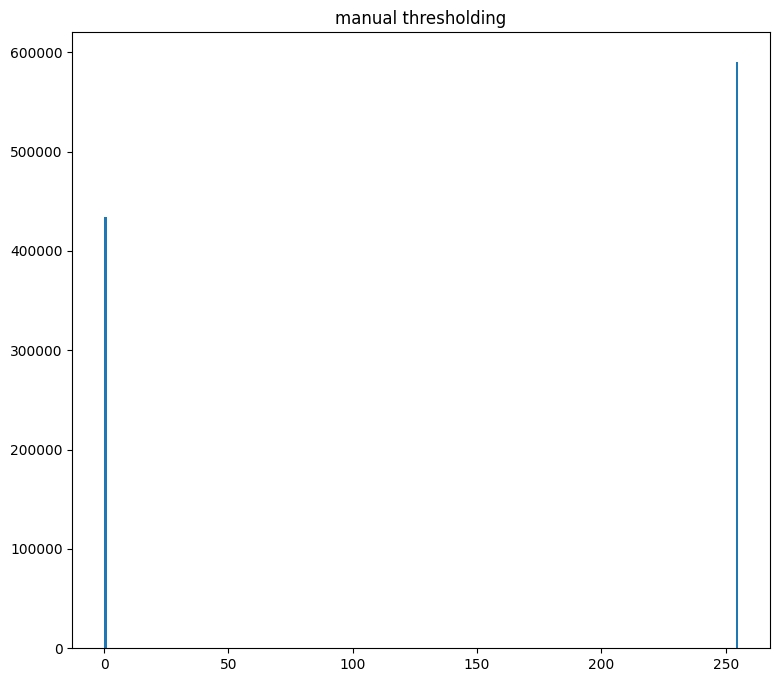

adaptive gaus thresholding
total pixels:  1024144
black pixels:  97360
percenteg of black pixels:  42.34082316549235
contours area:  2400339.0
percentage of contour Area: 234.37514646377852


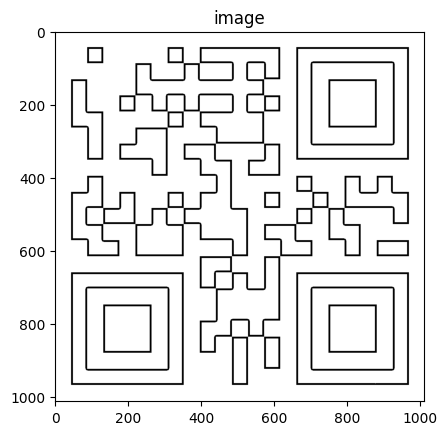

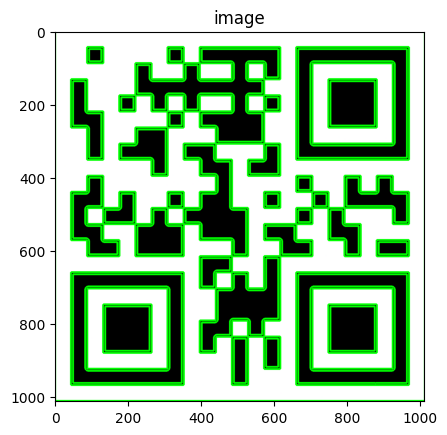

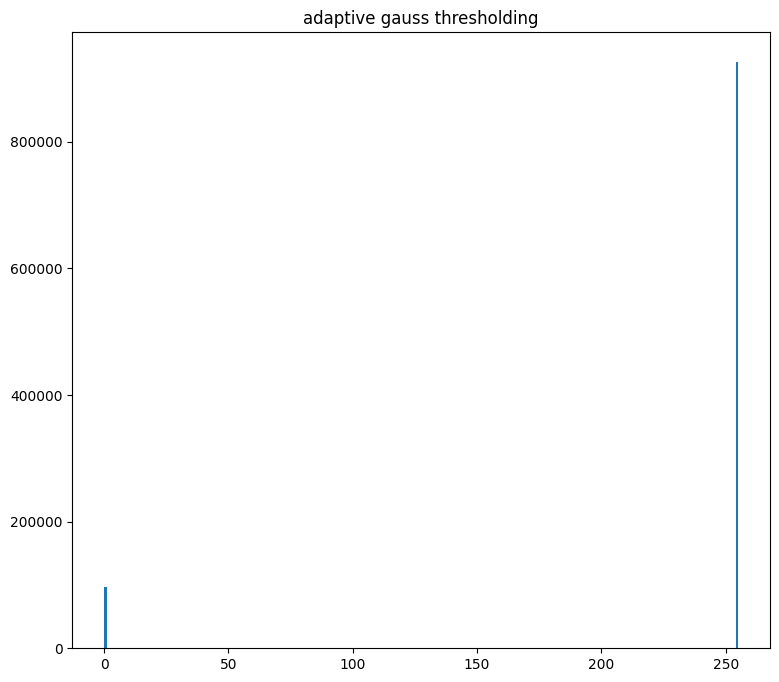

adaptive mean thresholding
total pixels:  1024144
black pixels:  98300
percenteg of black pixels:  42.34082316549235
contours area:  2399649.0
percentage of contour Area: 234.3077731256542


KeyboardInterrupt: 

In [44]:
grayImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# get percentage of black and white with no thresholding
print("no thresh")
print("total pixels: ", grayImg.size)
print("black pixels: ", grayImg.size - cv2.countNonZero(grayImg))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(grayImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("no thresholding")
plt.hist(grayImg.ravel(), bins=256);
plt.show()

# get percentage of black and white with manual thresholding
print("manual thresholding")
_, manualThresh = cv2.threshold(grayImg, 128, 255, cv2.THRESH_BINARY)
print("total pixels: ", manualThresh.size)
print("black pixels: ", manualThresh.size - cv2.countNonZero(manualThresh))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(manualThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(manualThresh)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("manual thresholding")
plt.hist(manualThresh.ravel(), bins=256);
plt.show()

# get percentage of black and white with adaptive thresholding
print("adaptive gaus thresholding")
adaptgaussThreshold=cv2.adaptiveThreshold(grayImg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
print("total pixels: ", adaptgaussThreshold.size)
print("black pixels: ", adaptgaussThreshold.size - cv2.countNonZero(adaptgaussThreshold))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(adaptgaussThreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(adaptgaussThreshold)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("adaptive gauss thresholding")
plt.hist(adaptgaussThreshold.ravel(), bins=256);
plt.show()

# get percentage of black and white with adaptive thresholding
print("adaptive mean thresholding")
adaptMeanThreshold=cv2.adaptiveThreshold(grayImg,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
print("total pixels: ", adaptMeanThreshold.size)
print("black pixels: ", adaptMeanThreshold.size - cv2.countNonZero(adaptMeanThreshold))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(adaptMeanThreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(adaptMeanThreshold)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("adaptive mean thresholding")
plt.hist(adaptMeanThreshold.ravel(), bins=256);
plt.show()

# get percentage of black and white with otsuThresh
print("otsu thresholding")
_,otsuThresh=cv2.threshold(grayImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("total pixels: ", otsuThresh.size)
print("black pixels: ", otsuThresh.size - cv2.countNonZero(otsuThresh))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(otsuThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(otsuThresh)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("otsu thresholding")
plt.hist(otsuThresh.ravel(), bins=256);
plt.show()

# get percentage of black and white with otsuGaussianThresh
print("otsu with gaussian blur thresholding")
blur = cv2.GaussianBlur(grayImg,(5,5),0)
_,otsuGaussianThresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("total pixels: ", otsuGaussianThresh.size)
print("black pixels: ", otsuGaussianThresh.size - cv2.countNonZero(otsuGaussianThresh))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(otsuGaussianThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(otsuGaussianThresh)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("otsuGaussianThresh")
plt.hist(otsuGaussianThresh.ravel(), bins=256);
plt.show()

# get percentage of black and white with otsu adaptive thresholding
plt.title("adaptive otsu thresholding")
adaptOtsuThreshold=cv2.adaptiveThreshold(grayImg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY+cv2.THRESH_OTSU,11,2)
print("total pixels: ", adaptOtsuThreshold.size)
print("black pixels: ", adaptOtsuThreshold.size - cv2.countNonZero(adaptOtsuThreshold))
print("percenteg of black pixels: ", 100*(grayImg.size - cv2.countNonZero(grayImg))/grayImg.size)
contours,_ = cv2.findContours(adaptOtsuThreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourAreaPercent = sum(cv2.contourArea(contour) for contour in contours)
print("contours area: ", contourAreaPercent)
print("percentage of contour Area:", 100*contourAreaPercent/grayImg.size)
ut.showImage(adaptOtsuThreshold)
ut.showImage(ut.drawContours(image, contours))
plt.figure(figsize=(9,8));
plt.title("otsu adaptive thresholding")
plt.hist(adaptOtsuThreshold.ravel(), bins=256);
plt.show()


In [ ]:

# ut.showImage(grayImg)

# ut.showImage(image)

# Apply Canny edge detection
# edges = cv2.Canny(image, 0, 255)

# Display the result
# cv2.imshow('Canny Edge Detection', edges)

# ut.showImage(edges)

# thresholdedImage=ut.loadImage('../TC/09.png')
# contours,_ = cv2.findContours(thresholdedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cont_img= cv2.drawContours(image, contours, -1, (0,255,0), 3)
# ut.showImage(cont_img)



# _, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) # figsize is in inches, yuck
# plt.sca(axarr[0]); plt.imshow(image,cmap='gray');
# plt.sca(axarr[1]); plt.imshow(edges,cmap='gray');
# plt.sca(axarr[2]); plt.imshow(cont_img,cmap='gray');
# plt.show()

# contours= ut.locatorContours(grayImg)

# contourImg = ut.drawContours(image, contours)
# ut.showImage(contourImg)
# fixFlippedQr =  ut.fixFlippedFixedQr(grayImg, contours)
# ut.showImage(fixFlippedQr)

In [ ]:
image= cv2.imread('../TC/09.png')
edges = cv2.Canny(image, 100, 100)


edges= cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
output = image+ edges

_, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) # figsize is in inches, yuck
plt.sca(axarr[0]); plt.imshow(image,cmap='gray');
plt.sca(axarr[1]); plt.imshow(edges,cmap='gray');
plt.sca(axarr[2]); plt.imshow(output,cmap='gray');
plt.show()

In [ ]:
# frequency noise:
dft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum.
dft_shift = np.fft.fftshift(dft)